# Climate CO₂ Forecast

This notebook demonstrates a machine learning approach to forecast CO₂ emissions in support of **SDG 13: Climate Action**.

## IMPORT THE RELEVANT LIBRARIES

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# LOAD THE DATASET



In [33]:
df = pd.read_csv("../DATA/owid-co2-data.csv")

df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# DATA CLEANING

In this step, we prepare the dataset for analysis and machine learning by identifying and correcting issues in the raw data. Cleaning the dataset ensures the models we build are accurate, reliable, and not biased by missing or incorrect information.

## step 1. We begin by inspecting the dataset's structure, checking for:

- The number of rows and columns
- Data types of each column
- Null or missing values
- Summary statistics

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

In [35]:
df.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,50191.000000,4.101900e+04,1.525100e+04,28863.000000,25358.000000,29137.000000,26981.000000,26002.000000,23585.000000,23285.000000,...,2108.000000,41001.000000,38060.000000,41001.000000,41001.000000,38060.000000,37410.000000,37236.000000,4535.000000,4535.000000
mean,1919.883067,5.686141e+07,3.300495e+11,7.767746,0.059036,415.698178,6.208882,43.104462,535.581202,7.214604,...,7.512655,2.269285,0.003026,0.007670,0.011023,0.000509,488.542225,316.133529,-7.232399,20.524440
std,65.627296,3.199905e+08,3.086383e+12,62.595292,0.120328,1945.843973,62.322553,1729.939596,2202.219657,99.347980,...,17.671054,9.315325,0.016519,0.043694,0.061901,0.003043,2392.579910,1839.602293,250.640012,52.744956
min,1750.000000,2.150000e+02,4.998000e+07,0.000000,0.000000,0.000000,-1977.750000,-100.000000,-99.693000,-2325.500000,...,0.000000,-0.810000,-0.001000,0.000000,-0.001000,0.000000,-14.961000,0.000000,-2195.952000,-98.849000
25%,1875.000000,3.273130e+05,7.874038e+09,0.000000,0.000000,0.374000,-0.005000,-1.102500,6.418000,-0.908000,...,0.204750,0.004000,0.000000,0.000000,0.000000,0.000000,1.835000,0.235000,-3.179500,-6.168000
50%,1924.000000,2.289522e+06,2.743861e+10,0.000000,0.001000,4.990000,0.044000,3.803500,27.691000,0.078000,...,0.838000,0.078000,0.000000,0.000000,0.000000,0.000000,15.007500,2.371000,1.518000,8.701000
75%,1974.000000,9.862459e+06,1.212627e+11,0.486000,0.075750,53.273000,1.002000,10.890750,123.959000,2.620000,...,3.211000,0.359000,0.001000,0.001000,0.001000,0.000000,78.242750,29.337500,9.153500,32.666000
max,2023.000000,8.091735e+09,1.301126e+14,1696.308000,2.484000,37791.570000,1865.208000,180870.000000,41416.480000,2340.184000,...,100.000000,100.000000,0.422000,1.161000,1.668000,0.085000,53816.852000,44114.785000,1798.999000,568.635000


In [36]:
df.isnull().sum().sort_values(ascending=False)

share_global_other_co2               48083
share_global_cumulative_other_co2    48083
other_co2_per_capita                 47717
other_industry_co2                   46989
cumulative_other_co2                 46989
                                     ...  
temperature_change_from_co2           9190
population                            9172
iso_code                              7929
year                                     0
country                                  0
Length: 79, dtype: int64

## step 2: Handling Missing Values
The dataset contains some missing values (NaN) in certain columns. Our approach:

- Drop columns with too many missing values that aren't essential for CO₂ prediction

- For remaining columns with few NaNs, fill them using methods like:

             - fillna(method='ffill'): forward-fill

             - fillna(method='bfill'): backward-fill

             - fillna(mean/median): numerical imputation

In [37]:
drop_columns = [
    'iso_code', 'continent', 'other_industry_co2', 'cement_co2_per_capita',
    'coal_co2_per_capita', 'oil_co2_per_capita', 'gas_co2_per_capita',
    'flaring_co2_per_capita', 'trade_co2', 'trade_co2_share'
]
df.drop(columns=drop_columns, inplace=True, errors='ignore')

In [38]:
# Filter dataset: Keep rows with key fields non-null
df = df[df['year'].notnull() & df['co2'].notnull()]

In [39]:
# Fill remaining missing values (numeric columns only)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


In [40]:
# Feature Engineering: Create useful derived columns
df['co2_per_gdp'] = df['co2'] / df['gdp']
df['co2_per_capita'] = df['co2'] / df['population']



In [41]:
# Select final feature set
selected_columns = [
    'country', 'year', 'co2', 'gdp', 'population',
    'coal_co2', 'oil_co2', 'gas_co2', 'co2_per_gdp', 'co2_per_capita'
]
df = df[selected_columns]
df.head()

,country,year,co2,gdp,population,coal_co2,oil_co2,gas_co2,co2_per_gdp,co2_per_capita
199,Afghanistan,1949,0.015,9.421400e+09,7356890.0,0.015,0.000,0.0,1.592120e-12,2.038905e-09
200,Afghanistan,1950,0.084,9.421400e+09,7776182.0,0.021,0.063,0.0,8.915872e-12,1.080222e-08
201,Afghanistan,1951,0.092,9.692280e+09,7879343.0,0.026,0.066,0.0,9.492091e-12,1.167610e-08
202,Afghanistan,1952,0.092,1.001733e+10,7987783.0,0.032,0.060,0.0,9.184089e-12,1.151759e-08
203,Afghanistan,1953,0.106,1.063052e+10,8096703.0,0.038,0.068,0.0,9.971290e-12,1.309175e-08


# Feature Selection and Train/Test Split
To train an effective machine learning model, we must choose relevant input features (independent variables) and define a target variable (what we want to predict).

## Target Variable
Our target is:

co2 — total CO₂ emissions, the value we want to forecast.

## Input Features
We select variables that influence CO₂ emissions, including:

year (temporal trend)

gdp (economic growth)

population (scale of activity)

coal_co2, oil_co2, gas_co2 (emissions by energy source)

co2_per_gdp, co2_per_capita (efficiency and intensity metrics)

## Train/Test Split
We split the data into training and testing sets:

Training Set (80%): used to train the model
Test Set (20%): used to evaluate model performance on unseen data

We use scikit-learn's train_test_split() function for this purpose

In [42]:
# 1. Define input features and target variable
features = [
    'year', 'gdp', 'population',
    'coal_co2', 'oil_co2', 'gas_co2',
    'co2_per_gdp', 'co2_per_capita'
]
target = 'co2'

X = df[features]
y = df[target]

# 2. Split into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Print shapes for verification
print("✅ Feature matrix (X) shape:", X.shape)
print("✅ Target vector (y) shape:", y.shape)
print("✅ Training set size:", X_train.shape)
print("✅ Test set size:", X_test.shape)


✅ Feature matrix (X) shape: (29137, 8)
✅ Target vector (y) shape: (29137,)
✅ Training set size: (23309, 8)
✅ Test set size: (5828, 8)


# Model Training
We begin with a Linear Regression model — ideal for establishing a baseline in forecasting tasks. Linear regression attempts to model the relationship between the input features and the target variable (CO₂ emissions) using a linear equation.

## Why Linear Regression?
Easy to implement and interpret

Suitable for continuous target variables like co2

Helps identify feature importance and trends

### Model Training Process
Initialize the Linear Regression model from Scikit-learn

Fit the model using the training data (X_train, y_train)

Predict CO₂ emissions on the test data (X_test)

Evaluate performance using metrics like:

Mean Absolute Error (MAE)

Root Mean Squared Error (RMSE)

R² Score (explained variance)



In [43]:
# 1. Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. Predict on the test set
y_pred = lr_model.predict(X_test)

# 3. Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance (Linear Regression):")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")

# Optional: show coefficients
print("\n📈 Feature Coefficients:")
for feature, coef in zip(features, lr_model.coef_):
    print(f"{feature}: {coef:.4f}")


📊 Model Performance (Linear Regression):
✅ MAE: 443.57
✅ RMSE: 1102.57
✅ R² Score: 0.62

📈 Feature Coefficients:
year: 4.0397
gdp: 0.0000
population: 0.0000
coal_co2: -0.0772
oil_co2: 1.1215
gas_co2: -0.1802
co2_per_gdp: 0.0000
co2_per_capita: 1794.7076


# Model Evaluation
After training our model, it's crucial to assess its performance using both quantitative metrics and visualizations.

## Evaluation Metrics
We use the following standard regression metrics:

Mean Absolute Error (MAE): Average of absolute prediction errors
Root Mean Squared Error (RMSE): Penalizes larger errors more than MAE
R² Score (R-squared): Measures how well the model explains variability in the target
1.0 is a perfect score, 0.0 means no explanatory power

## Evaluation Plots
To better understand the model’s performance:

Actual vs. Predicted Plot: How closely predictions match real CO₂ values

Residual Plot: The difference between predicted and actual values (should look randomly scattered)

c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8322 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128204 missing from current font.
  font.set_text(s, 0, flags=flags)


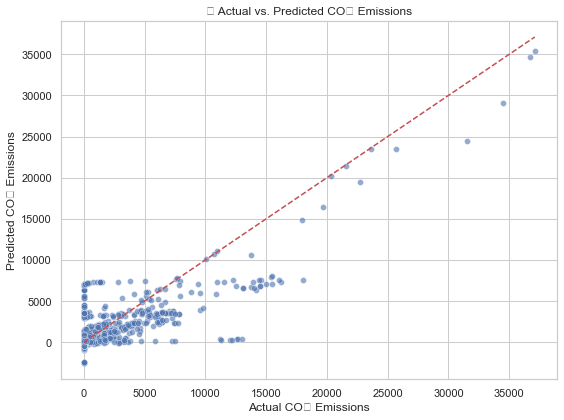

In [48]:
# Set style
sns.set(style='whitegrid')

# 1. Actual vs. Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual CO₂ Emissions')
plt.ylabel('Predicted CO₂ Emissions')
plt.title('📌 Actual vs. Predicted CO₂ Emissions')
plt.tight_layout()
plt.show()





c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128204 missing from current font.
  font.set_text(s, 0, flags=flags)


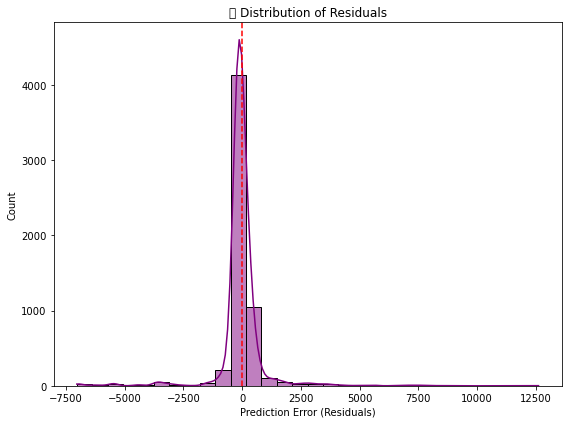

In [46]:
# 2. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Prediction Error (Residuals)')
plt.title('📌 Distribution of Residuals')
plt.tight_layout()
plt.show()


c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128204 missing from current font.
  font.set_text(s, 0, flags=flags)


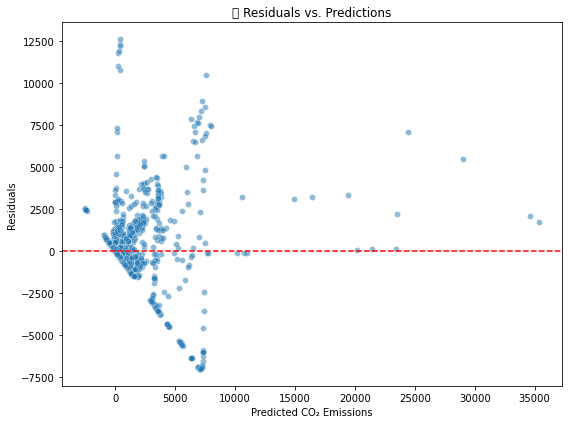

In [47]:
# 3. Residual Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted CO₂ Emissions')
plt.ylabel('Residuals')
plt.title('📌 Residuals vs. Predictions')
plt.tight_layout()
plt.show()

## Interpretation:
If the Actual vs. Predicted plot shows points close to the diagonal red line → good predictions

If the Residuals are centered around 0 and randomly scattered → model is likely unbiased

# Ethical Reflection: Fairness, Bias, and Sustainability
As we build machine learning models to forecast CO₂ emissions, it's vital to reflect on the ethical implications of our work. Machine learning is not just about prediction accuracy — it's also about responsibility, transparency, and equity.



# 1. Data Bias and Limitations
Unequal data representation: Some countries, especially in the Global South, may have incomplete or outdated environmental data. This can cause the model to perform poorly for underrepresented regions, reinforcing global inequality.

GDP & population as proxies: Using economic indicators like GDP can unintentionally bias the model toward wealthier countries, potentially downplaying the impact of developing nations.

Historical data bias: If past emissions are used without context, the model may ignore recent climate policy shifts or green energy investments.

How we addressed it:

Carefully selected and cleaned features to avoid misleading signals.

Acknowledged gaps in the data and used imputation only when appropriate.

Focused evaluation on general patterns rather than country-specific predictions.



# 2. Promoting Fairness and Sustainability
Equitable outcomes: This model should be used to inform policies that hold major polluters accountable, not to penalize nations still developing.

Transparency: Our use of an interpretable model like Linear Regression promotes transparency, allowing policymakers to understand which features influence emissions most.

Sustainable use: Predictive insights from this model can help target high-emission sectors and optimize intervention strategies, such as transitioning away from coal or improving carbon efficiency.

# 3. Responsible AI in Climate Action
No techno-solutionism: Machine learning alone cannot solve climate change. Our model is a decision support tool, not a replacement for expert judgment or environmental justice.

Open-source ethics: By using open data and sharing our methodology, we promote accessibility, collaboration, and global inclusion in the climate fight.